In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve as rc
from matplotlib import pyplot as plt

# Problem 1
Find some aspect of your final research project where a naïve Bayes classifier is appropriate, and apply Naive Bayes to that.  Compare the result to what logistic regression and support vector machines give you on the same data. 

Data comes from average player data for any given year, and is meant to classify if they were a contributor to tournament games that same year.

In [2]:
import pandas as pd
import os
path = '../../../../Senior Project/DATA/'

train = []
test = []

# Walk through player files
for dir_path , dir_name , file_names in os.walk(path) :
    # 2017 will be our testing set
    if '2017' in dir_path :
        for name in file_names :
            # Grab avgs file
            if name[-4:] == 'avgs' :
                data = pd.read_csv(os.path.join(dir_path,name))
                if isinstance(test,list) :
                    test = data.drop(['Unnamed: 0'],axis=1).as_matrix()
                else :
                    test = np.vstack((test,data.drop(['Unnamed: 0'],axis=1)))
    # Everything else will become our training set
    else :
        for name in file_names :
            # Grab avgs file
            if name[-4:] == 'avgs' :
                data = pd.read_csv(os.path.join(dir_path,name))
                if isinstance(train,list) :
                    train = data.drop(['Unnamed: 0'],axis=1).as_matrix()
                else :
                    train = np.vstack((train,data.drop(['Unnamed: 0'],axis=1).as_matrix()))

# From the way the data is saved, the last column is whether or not the player
#     is a score on how much of a contributor he was during the season.
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

# This cell is for adjusting the trianing set by dropping different columns
# The columns to drop were decided in HW 4 using LR and and L1 penalty
remove_columns = [0,4,7,8,10,11,12,13,14,15,16,17,18]
for col in remove_columns :
    train_x[:,col] = np.zeros_like(train_x[:,col])
    test_x[:,col] = np.zeros_like(test_x[:,col])

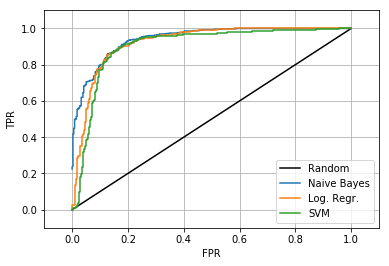

In [3]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb_score = gnb.predict_proba(test_x)
g_fpr, g_tpr, g_thresh = rc(test_y,gnb_score[:,1])

# From HW 4, C=1e-10 performed best
lgr = LogisticRegression(C=1e-10)
lgr.fit(train_x,train_y)
lgr_score = lgr.predict_proba(test_x)
l_fpr, l_tpr, l_thresh = rc(test_y,lgr_score[:,1])

svc = SVC(probability=True)
svc.fit(train_x,train_y)
svc_score = svc.predict_proba(test_x)
s_fpr, s_tpr, s_thresh = rc(test_y,svc_score[:,1])

plt.plot([0,1],[0,1],'-k',label='Random')
plt.plot(g_fpr,g_tpr,label='Naive Bayes')
plt.plot(l_fpr,l_tpr,label='Log. Regr.')
plt.plot(s_fpr,s_tpr,label='SVM')

plt.legend(loc='best')
plt.axis([-0.1,1.1,-0.1,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(axis='both')
plt.show()

In [4]:
a = 1
b = 1

NB = [a*g_fpr[i]+b*(1-g_tpr[i]) for i in range(len(g_fpr))]
LR = [a*l_fpr[i]+b*(1-l_tpr[i]) for i in range(len(l_fpr))]
SV = [a*s_fpr[i]+b*(1-s_tpr[i]) for i in range(len(s_fpr))]
ind1 = NB.index(min(NB))
ind2 = LR.index(min(LR))
ind3 = SV.index(min(SV))
tau1 = g_thresh[ind1]
tau2 = l_thresh[ind2]
tau3 = s_thresh[ind3]
print('The optimal thresholds are:')
print('    Naive Bayes     : {}'.format(tau1))
print('    Log. Regression : {}'.format(tau2))
print('    SV Machine      : {}'.format(tau3))

The optimal thresholds are:
    Naive Bayes     : 0.07310064385860005
    Log. Regression : 0.5001225153180678
    SV Machine      : 0.6158820999361976


# Problem 2
Plot the ROC (scikit-learn has an ROC function you can use) for the following classifiers on the scilit-learn cancer dataset
1. naïve Bayes,

2. logistic regression, and

3. support vector machines (with probabilities, not just classification)

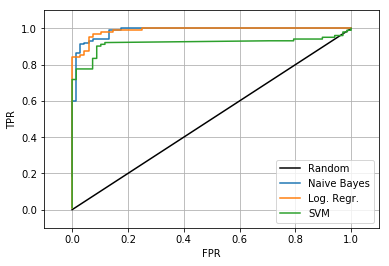

In [5]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
tr_x, ts_x, tr_y, ts_y = train_test_split(x,y,test_size=0.3)

gnb = GaussianNB()
gnb.fit(tr_x,tr_y)
gnb_score = gnb.predict_proba(ts_x)
g_fpr, g_tpr, g_thresh = rc(ts_y,gnb_score[:,1])

lgr = LogisticRegression()
lgr.fit(tr_x,tr_y)
lgr_score = lgr.predict_proba(ts_x)
l_fpr, l_tpr, l_thresh = rc(ts_y,lgr_score[:,1])

svc = SVC(probability=True)
svc.fit(tr_x,tr_y)
svc_score = svc.predict_proba(ts_x)
s_fpr, s_tpr, s_thresh = rc(ts_y,svc_score[:,1])

plt.plot([0,1],[0,1],'-k',label='Random')
plt.plot(g_fpr,g_tpr,label='Naive Bayes')
plt.plot(l_fpr,l_tpr,label='Log. Regr.')
plt.plot(s_fpr,s_tpr,label='SVM')

plt.legend(loc='best')
plt.axis([-0.1,1.1,-0.1,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(axis='both')
plt.show()

# Problem 3
Describe an appropriate cost function of the form a*FPR + b*FNR (that is, choose meaningful values of a and b) for the cancer dataset, assuming you are an insurance company that has to pay medical costs of treatment and also life insurance at death for each patient.  Given that cost function, use the ROC in the traditional manner (not Jarvis's new way) to identify the optimal choice of threshold τ for each of the three classifiers in part 2

To calculate the cost of a false negative (someone I think will have a malignant tumor but it's actually benign), I simply need to add up how much they would have paid me over their lifetime, as that's money I've lost out on.  Assuming that the individual discovers the tumor (and thus comes to buy both health and life insurance) around 40 and would live to be 80, this gives 40 years of effective payment.  Aflac's disclaimers state that rates can be as low as \$2.37 per week for life insurance and \$3.18 per week for health insurance, so these numbers are used for computation.   After a bit of searching, I found that Aflac (citing healthcarebluebook.com) claims the total cost of lung cancer (not breast cancer, I know) caught at stage 2 to be around \$207,059.  As an insurance company, I'd like more of my policy holders to buy more expensive packages, which in turn means my company is responsible for more of the bill.  For simplicity, I'll then assume that I'm covering all of it, and that my company is moral enough to honor its obligations and payout every time.  Similarly, Aflac advertises that they're willing to pay out as much as \$112,500 to the beneficiary of a life insurance policy.  However, I'm going to have to pay out the life insurance claim either way,  so it won't effect my cost ratio.  This gives me the cost of a false positive (someone I think will have a benign tumor but it's actually malignant) at \$207059 minus whatever they pay during their remaining lifetime.  For simplicity, assume that malignant tumors develop to stage 2 lung cancer around age 60 (unbased assumption), and survive for about 5 years (verywell.com), with a potential survival rate of 0.06 percent (can't remember where I found this).

In [6]:
payout = 207059
years_survived = 5
survival_rate = 0.06
weekly_prem = 2.37 + 3.18
weeks_per_year = 52
years_paying = 80 - 40
guaranteed_years = 65-40
extra_if_survived = 80-65

# Calculation for lost income
b = weekly_prem*weeks_per_year*years_paying
# Calculation for cost of treating cancer and paying life insurance
# The 25 for 25 guaranteed years of payment (40-65) and the 15*0.06 for the 6\%
#     who survive and continue paying their insurance
a = payout - weekly_prem*weeks_per_year*(guaranteed_years+extra_if_survived*survival_rate)

NB = [a*g_fpr[i]+b*(1-g_tpr[i]) for i in range(len(g_fpr))]
LR = [a*l_fpr[i]+b*(1-l_tpr[i]) for i in range(len(l_fpr))]
SV = [a*s_fpr[i]+b*(1-s_tpr[i]) for i in range(len(s_fpr))]
ind1 = NB.index(min(NB))
ind2 = LR.index(min(LR))
ind3 = SV.index(min(SV))
tau1 = g_thresh[ind1]
tau2 = l_thresh[ind2]
tau3 = s_thresh[ind3]
print('The optimal thresholds are:')
print('    Naive Bayes     : {}'.format(tau1))
print('    Log. Regression : {}'.format(tau2))
print('    SV Machine      : {}'.format(tau3))

The optimal thresholds are:
    Naive Bayes     : 0.9999999079687922
    Log. Regression : 0.9357713815199546
    SV Machine      : 0.6156331595582182


In [7]:
print(a,b)
print(g_fpr[ind1],1-g_tpr[ind1])
print(l_fpr[ind2],1-l_tpr[ind2])
print(s_fpr[ind3],1-s_tpr[ind3])

199584.26 11544.0
0.0147058823529 0.135922330097
0.0 0.155339805825
0.0 0.281553398058
